<a href="https://colab.research.google.com/github/PanchiDude/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#This is a twitter sentiment analysis program using python

#importing the required libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [109]:
"""
#Method1
#Load the data using google libraries
from google.colab import files
upload_file = files.upload()
"""

'\n#Method1\n#Load the data using google libraries\nfrom google.colab import files\nupload_file = files.upload()\n'

In [110]:
#log= pd.read_csv('Details.csv')

In [111]:
"""
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]
#Method1 ends
"""

"\nconsumerKey = log['key'][0]\nconsumerSecret = log['key'][1]\naccessToken = log['key'][2]\naccessTokenSecret = log['key'][3]\n#Method1 ends\n"

In [112]:
#Method2
#Twitter API credentials
consumerKey = "gVrm6mtTpUhS50M7PkRumgB02"
consumerSecret = "TJ0Gt64DhyL7wRHRtKWdnlihkDPyDkigF4gmmWaI5KPkOsfpCD"
accessToken = "767765834-iUaxi0BqDEyyyUkxYTVbzpwf5Lug3cXs1krVXuuL"
accessTokenSecret = "nFLhqEAHE3fOlfPSfAxf9reze4qLF1rDcmcsZkFzRMPqa"

In [113]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#Set access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [114]:
#Extract 100 tweets from user or hashtags
posts = api.user_timeline(screen_name= "BillGates", count=100, lang = "en", tweet_mode="extended")

 #Print the last 5 tweets from the account
print("Show the last 5 tweet:\n")
i=1
for tweet in posts[0:5]:
 print(str(i) + ') ' + tweet.full_text + '\n')
 i = i+1

Show the last 5 tweet:

1) I've known and learned from @RonConway for more than 40 years. I'm glad to see @svangel team up with @bchesky to mentor and support companies working to create more economic empowerment opportunities for people across the world. https://t.co/PWK1VeSaxT

2) This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times. @exlarson provides a brilliant and gripping account of another era of widespread anxiety: the years 1940 and 1941. https://t.co/cm6IunxOZL

3) Monoclonal antibodies are one of the most promising treatments we have for COVID-19, thanks in large part to R&amp;D by Canadian scientists. Because of their generosity, people all around the world will have access to this potentially lifesaving treatment. https://t.co/2flhbV7e4n

4) RT @AlzData: We’re looking for new ways to advance #AlzheimersResearch. If you have an idea for tools, models, or algorithms that will expa…

5) Like many people, I’ve tried to deepen 

In [115]:
#Create a dataframe with a column called Tweets (In tabular form)
df=pd.DataFrame ( [tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,I've known and learned from @RonConway for mor...
1,This book has nothing to do with viruses or pa...
2,Monoclonal antibodies are one of the most prom...
3,RT @AlzData: We’re looking for new ways to adv...
4,"Like many people, I’ve tried to deepen my unde..."


In [116]:
#Cleaning text

#Creating a function to clean the tweets
def cleanData(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  #r tells python that expression is a raw string
  #re.sub means subtitute text matching the given pattern and replace with the second parameter i.e. ''
  text = re.sub(r'#', '', text) #removes hashtags symbol
  text = re.sub(r'RT[\s]+', '', text) #removes retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #removes hyperlink which may have https or only http

  return text
#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanData)

#Display the clean text
df

,Tweets
0,I've known and learned from for more than 40 ...
1,This book has nothing to do with viruses or pa...
2,Monoclonal antibodies are one of the most prom...
3,: We’re looking for new ways to advance Alzhei...
4,"Like many people, I’ve tried to deepen my unde..."
...,...
95,It’s important that we continue to follow scie...
96,"_org: ""We all have an obligation, a mission, a..."
97,“I truly believe that if there is faith and ho...
98,It’s hard to overstate how important finding a...


In [117]:
#function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity #Subjectivity tell how subjective or opinionated the text is

#funtion to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity #Polarity is how + or - the text is

#Create two new columns
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

#Display df with the new columns
df

,Tweets,Subjectivity,Polarity
0,I've known and learned from for more than 40 ...,0.550000,0.425000
1,This book has nothing to do with viruses or pa...,0.966667,0.600000
2,Monoclonal antibodies are one of the most prom...,0.525714,0.222857
3,: We’re looking for new ways to advance Alzhei...,0.454545,0.136364
4,"Like many people, I’ve tried to deepen my unde...",0.458000,0.282000
...,...,...,...
95,It’s important that we continue to follow scie...,0.727273,0.268182
96,"_org: ""We all have an obligation, a mission, a...",0.000000,0.000000
97,“I truly believe that if there is faith and ho...,0.000000,0.000000
98,It’s hard to overstate how important finding a...,0.547222,0.036111


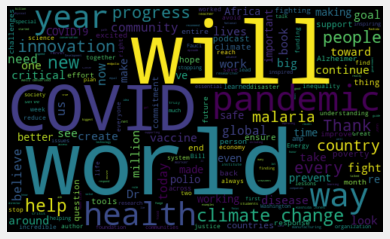

In [118]:
#Plot The Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
WordCloud = WordCloud(width = 500, height =300, random_state =21, max_font_size = 119).generate(allWords)

plt.imshow(WordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [119]:
#funtion to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#adding a new column
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Display df
df

,Tweets,Subjectivity,Polarity,Analysis
0,I've known and learned from for more than 40 ...,0.550000,0.425000,Positive
1,This book has nothing to do with viruses or pa...,0.966667,0.600000,Positive
2,Monoclonal antibodies are one of the most prom...,0.525714,0.222857,Positive
3,: We’re looking for new ways to advance Alzhei...,0.454545,0.136364,Positive
4,"Like many people, I’ve tried to deepen my unde...",0.458000,0.282000,Positive
...,...,...,...,...
95,It’s important that we continue to follow scie...,0.727273,0.268182,Positive
96,"_org: ""We all have an obligation, a mission, a...",0.000000,0.000000,Neutral
97,“I truly believe that if there is faith and ho...,0.000000,0.000000,Neutral
98,It’s hard to overstate how important finding a...,0.547222,0.036111,Positive


In [120]:
#Print all of the positive
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] +'\n')
    #print()
    j=j+1

1) I've known and learned from  for more than 40 years. I'm glad to see  team up with  to mentor and support companies working to create more economic empowerment opportunities for people across the world. 

2) This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times.  provides a brilliant and gripping account of another era of widespread anxiety: the years 1940 and 1941. 

3) Monoclonal antibodies are one of the most promising treatments we have for COVID-19, thanks in large part to R&amp;D by Canadian scientists. Because of their generosity, people all around the world will have access to this potentially lifesaving treatment. 

4) : We’re looking for new ways to advance AlzheimersResearch. If you have an idea for tools, models, or algorithms that will expa…

5) Like many people, I’ve tried to deepen my understanding of systemic racism in recent months. If you’re interested in learning more about the lives caught up in our country's justi

In [121]:
#Print all of the negative in descending order
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] +'\n')
    #print()
    j=j+1

1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

3) : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be di

In [122]:
#Print all of the Neutral
j=1

sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] +'\n')
    #print()
    j=j+1
"""
#sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, df.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) + ') ' + df['Tweets'][i] +'\n')
    #print()
    j=j+1
"""

1) : Since 2000, the malaria community has worked together to prevent 1.5 billion cases of malaria &amp; save 7.6 million lives…

2) : We must ensure these innovations reach everyone, not just those who can afford to pay. Our newest commitment to the CO…

3) : How can the fight to endpolio help inform the  COVID19 response? The ’s Elizabeth Thrush looks at how the lessons…

4)  The UAE is an essential partner in stopping polio in Pakistan. Thank you  for your continued commitment to polio eradication.

5) The COVID-19 pandemic has set back efforts to end poverty, hunger, and malnutrition. Investing in  will speed the recovery by helping farmers adapt to climate change and rebuild food systems after the pandemic (via ). 

6) This honor is well deserved. COVID-19 is not just a health crisis—it is also now a food crisis, and  is there to respond. I’m inspired by the thousands of people in the organization who have committed their lives to fighting hunger. 

7) For the last 25 years, Dr. F

"\n#sortedDF = df.sort_values(by=['Polarity'])\nfor i in range(0, df.shape[0]): #Number of rows in a df\n  if (sortedDF['Analysis'][i]=='Neutral'):\n    print(str(j) + ') ' + df['Tweets'][i] +'\n')\n    #print()\n    j=j+1\n"

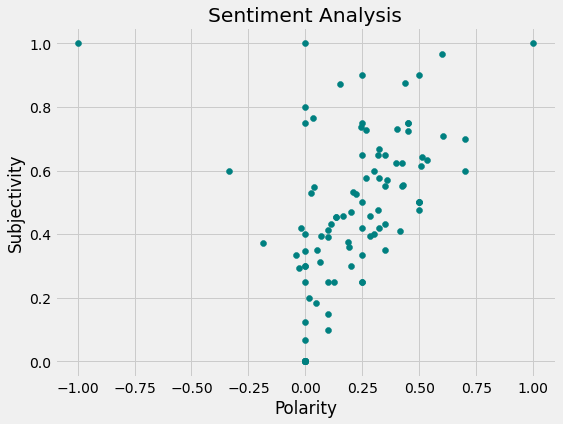

In [123]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Teal') 
  #(x-axis, y-axis, color)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [124]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
#ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

73.0

In [125]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
#ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1)

6.0

In [126]:
#Get the percentage of Neutral tweets
neutraltweets = df[df.Analysis == 'Neutral']
#neutraltweets = neutraltweets['Tweets']

round( (neutraltweets.shape[0] / df.shape[0]) *100, 1)

21.0

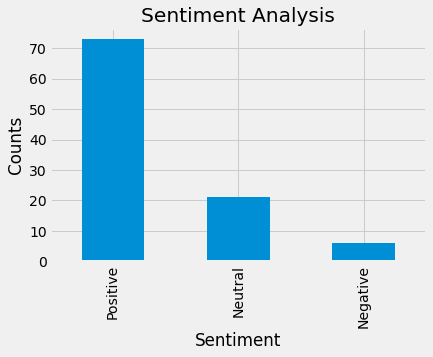

In [127]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

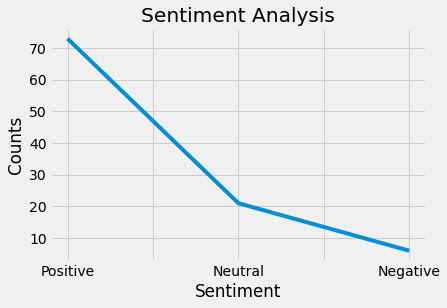

In [128]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

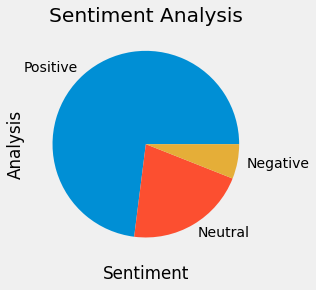

In [129]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()